In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

## Спектральный метод.

Зададим нашу сетку узлов.

In [41]:
def generate_grids(left_border, right_border, num_x_points, upper_bound, num_t_points):
    h = (right_border-left_border) / num_x_points
    nodes_x = np.linspace(left_border, right_border, num_x_points+1)
    tau = upper_bound / num_t_points
    nodes_t = np.linspace(0, upper_bound, num_t_points + 1)
    
    return nodes_x, nodes_t, h, tau

Определим функцию $$u(x,t)=u_0(x-at)$$
соответствующую точному решению поставленной задачи Коши. Зададим $a=10$ и $u_0(x) = x^2$, а также $\mu(t)=100t^2$.

In [42]:
def u(x, t, a, u_0):
    return u_0(x - a * t)
    
a = 10

def u_0(x):
    return x**2

def mu(t):
    return 100*t**2


Определим построенную разностную схему:
$$\begin{cases}
    \frac{y_k^{j+1}-y_k^j}{\tau}+a\Big(\sigma\frac{y_k^{j+1}-y_{k-1}^{j+1}}{h}+(1-\sigma)\frac{y_k^{j}-y_{k-1}^{j}}{h}\Big)=0,\\
    y_k^0=u_0(x),\\
    y_0^j=\mu^j.
\end{cases}$$
Отсюда определим рекуррентную формулу:
$$y_k^{j+1}=(1+\sigma\gamma)^{(-1)}(y_k^j(1-(1-\sigma)\gamma)+y_{k-1}^j((1-\sigma)\gamma)+y_{k-1}^{j+1}\sigma\gamma),\ \gamma=\frac{a\tau}{h}$$
Пусть $x\in [0,3],\ t\in[0,\frac{1}{4}]$, разобьем каждый из отрезков на 5 частей. Также необходимо помнить, что для усточивости по принципу максимума необходимо, чтобы $\sigma\in (0,1)$, возьмем, например $\sigma=\frac{1}{2}$. 

In [43]:
def diff_scheme_solve(nodes_x, nodes_t, h, tau, sigma, u_0, a):
    gamma = a * tau / h
    y = np.zeros((len(nodes_x), len(nodes_t)))

    for k in range(len(nodes_x)):
        y[k, 0] = u_0(nodes_x[k])
        
    for j in range(len(nodes_t)):
        y[0, j] = mu(nodes_t[j])

    for k in range(len(nodes_x)-1):
        for j in range(len(nodes_t)-1):
            y[k, j + 1] = (1 + sigma * gamma)**(-1) * (y[k, j] * (1 - (1 - sigma) * gamma) + y[k-1, j] * ((1 - sigma) * gamma) + y[k-1, j+1] * sigma * gamma)
            
    return y

С учетом предложенных отрезков, получаем следующие шаги $h, \tau:$

In [44]:
nodes_x, nodes_t, h, tau = generate_grids(0, 3, 5, 1/4, 5)
sigma = 1 / 2

print(f'h = {h}')
print(f'tau = {tau}')

h = 0.6
tau = 0.05


Проверим выполнение условий устойчивости при полученных $h=0.6,\  \tau=0.05,\ \sigma = \frac{1}{2}$, а именно 
$$h>a\tau(\sigma-1).$$

In [45]:
print(h > a * tau * (sigma - 1))

True


Условие выполняется, соответственно, по математическим обоснованиям построенная РС должны быть устойчивой. 

Построим график для решениея, полученного нашей разностной схемой и точного решения.

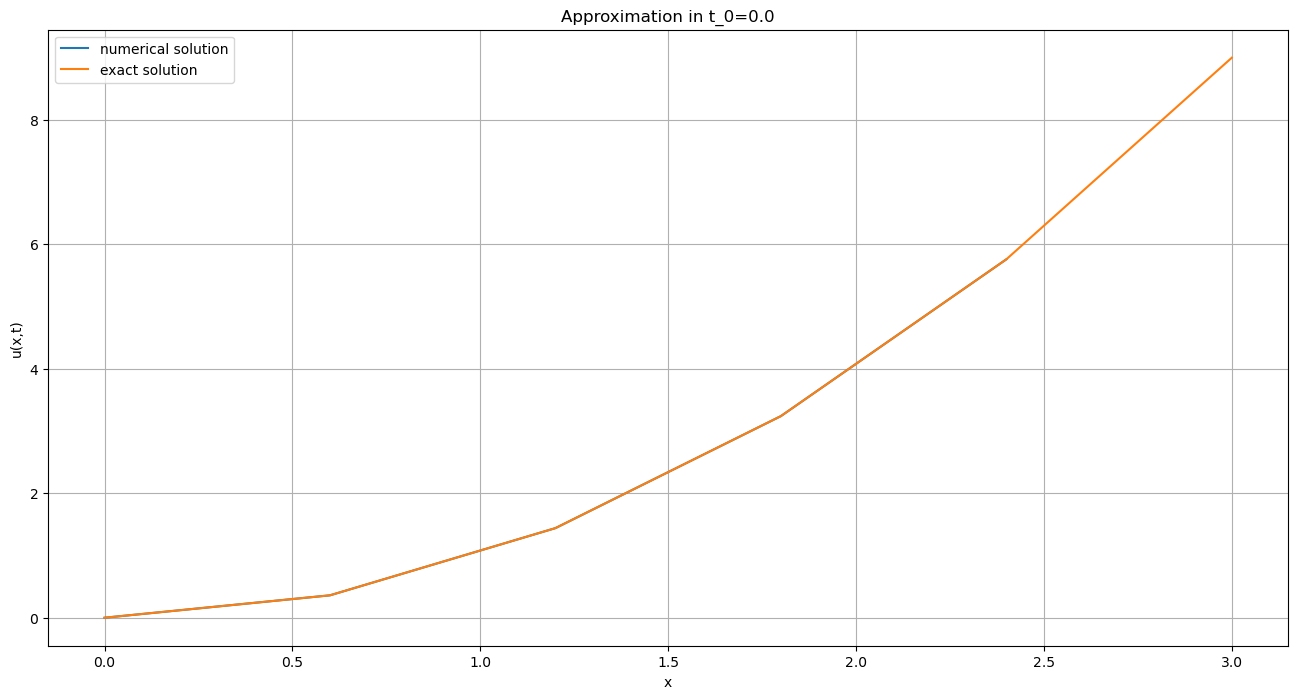

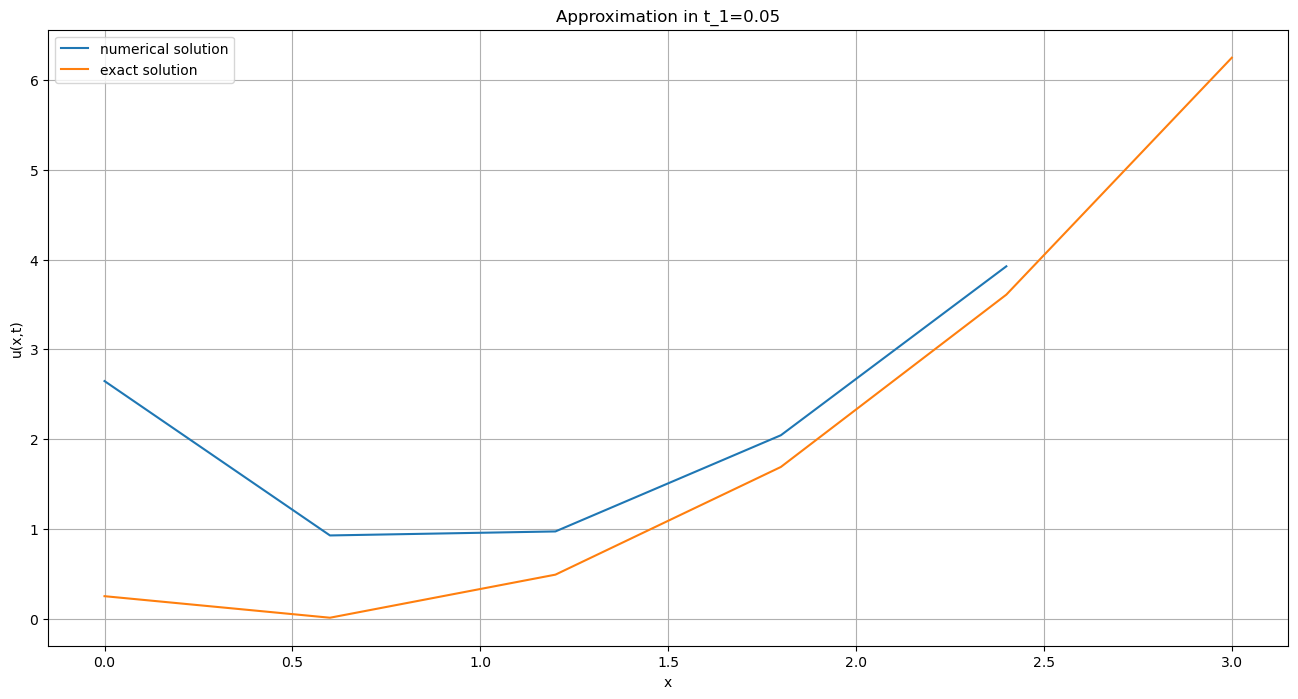

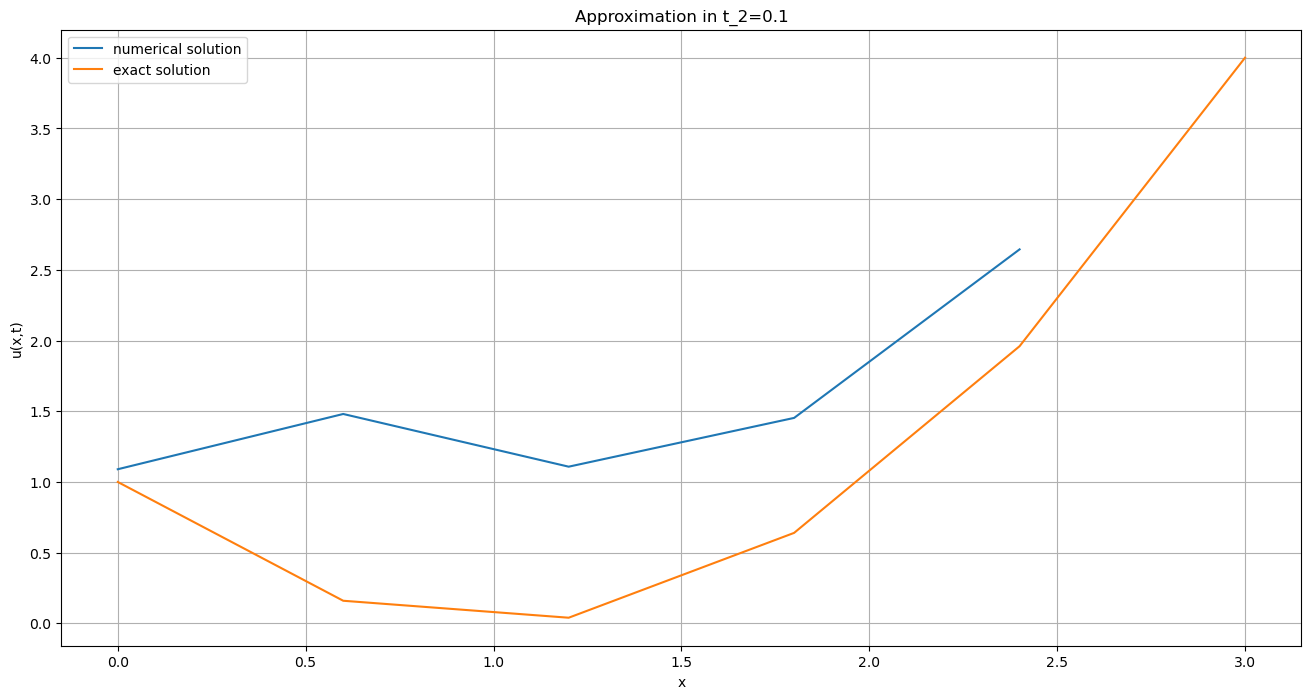

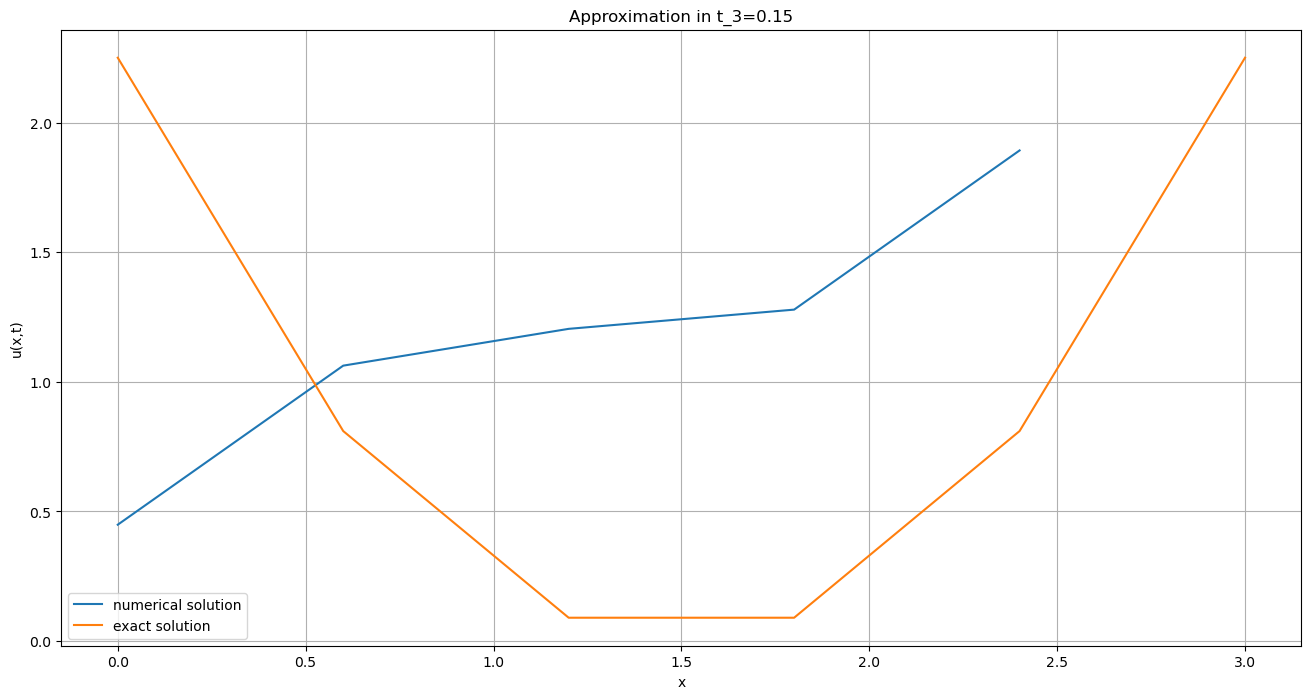

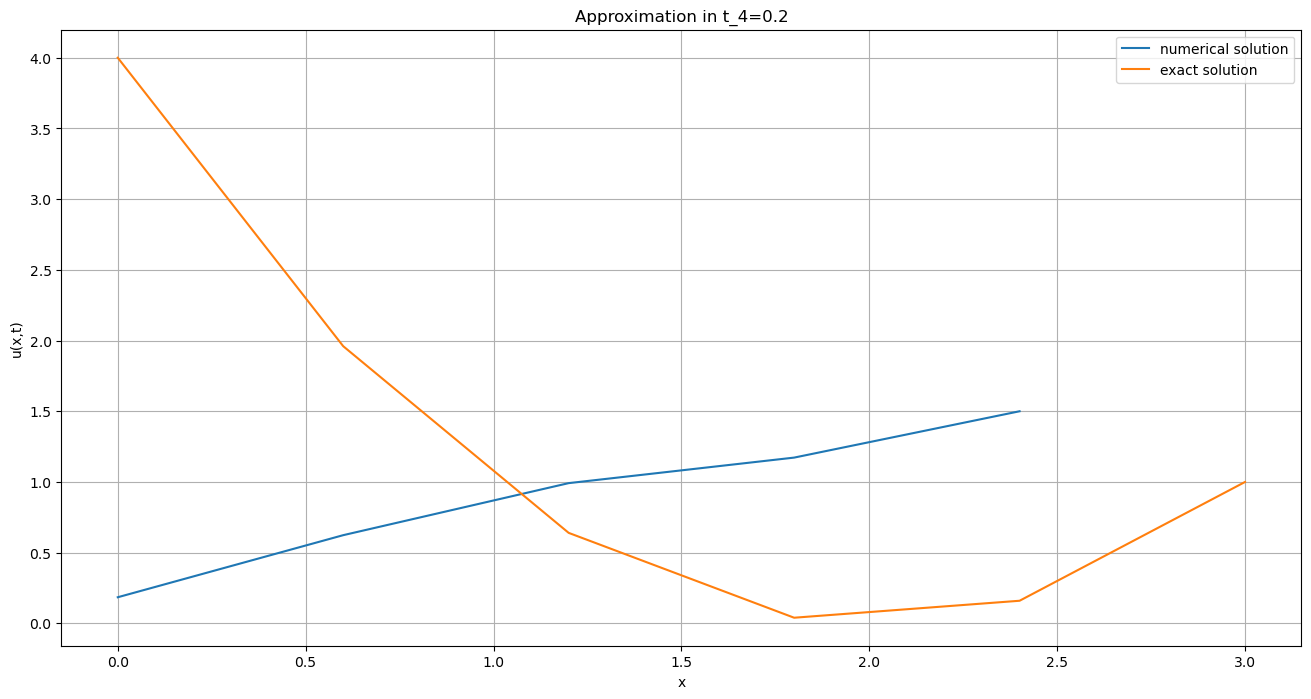

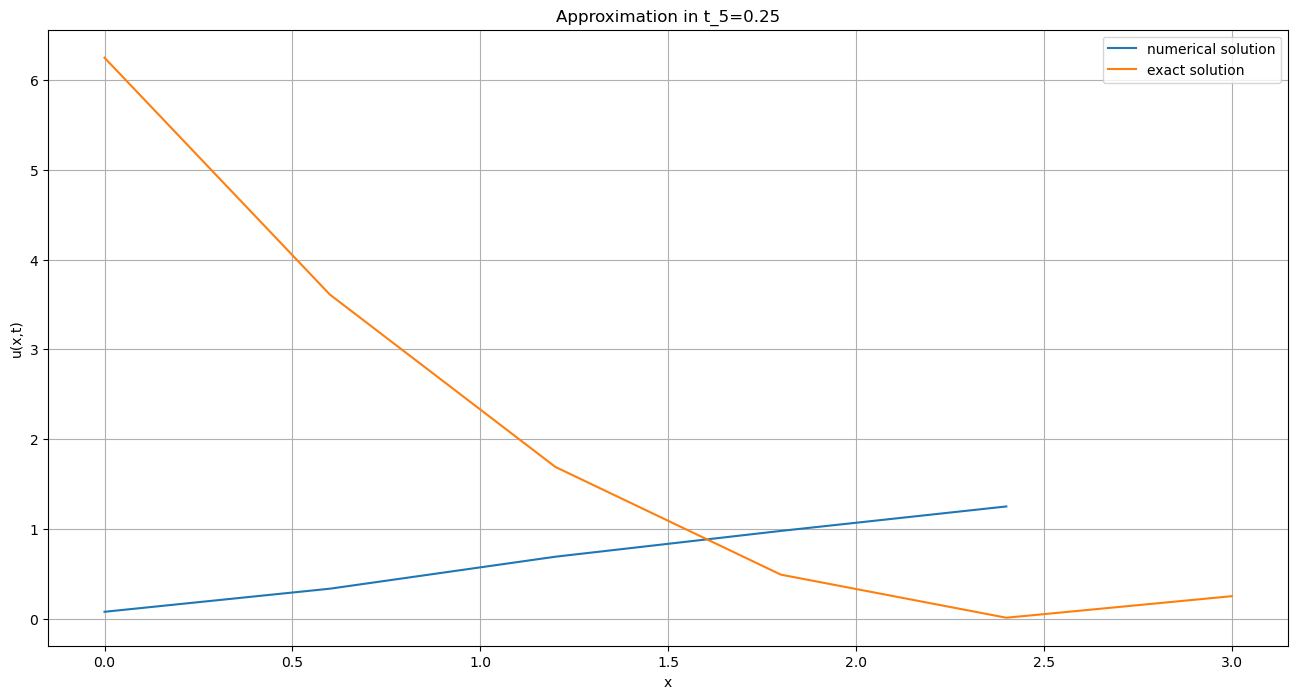

In [46]:
y = diff_scheme_solve(nodes_x, nodes_t, h, tau, sigma, u_0, a)

for j, t in enumerate(nodes_t):
    plt.figure(figsize=(16, 8))
    plt.plot(nodes_x[:-1], y[:-1, j], label='numerical solution')
    plt.plot(nodes_x, u(nodes_x, t, a, u_0), label='exact solution')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.title('Approximation in t_' + str(j) + '=' + str(round(t, 2)))
    plt.legend()
    plt.show()

Как видим, с увеличением $t$ точность решения ухужшается, но успешно описывает точное решение, то есть можно сделать вывод, что схема дейстивтельно оказалась устойчивой.

## Спектральный метод.

Для проверки устойчивости спектральным методом необходимо проверить выполнение условия:
$$\sigma\geq\frac{\gamma+1}{2\gamma}=\frac{1}{2}+\frac{h}{2a\tau}$$

In [47]:
print(sigma > 1/2 + h / (2 * a * tau))

False


Отсюда получаем, что для спектрального метода $\sigma=\frac{1}{2}$ не подходит, выберем $\sigma = \frac{5}{4}$ и проверим условие.

In [48]:
sigma = 5 / 4 

print(sigma > 1 / 2 + h / (2 * a * tau))

True


Проверим РС с новым параметром $\sigma = \frac{5}{4}$.

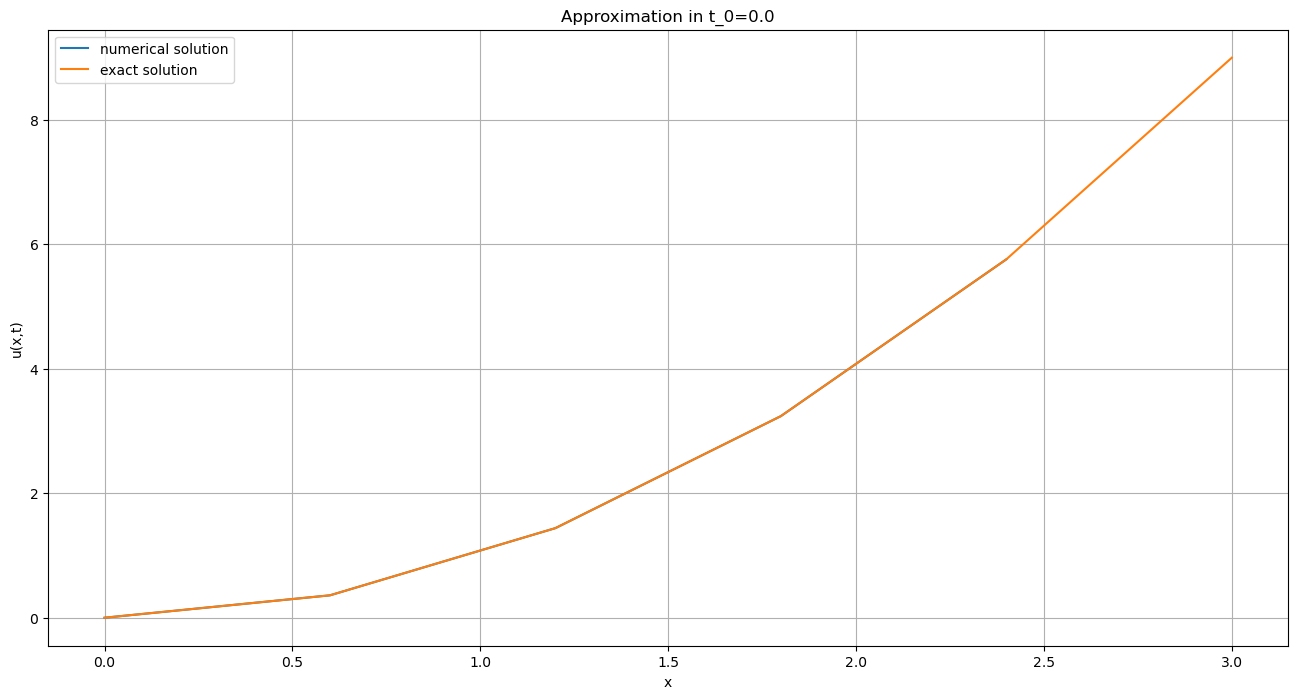

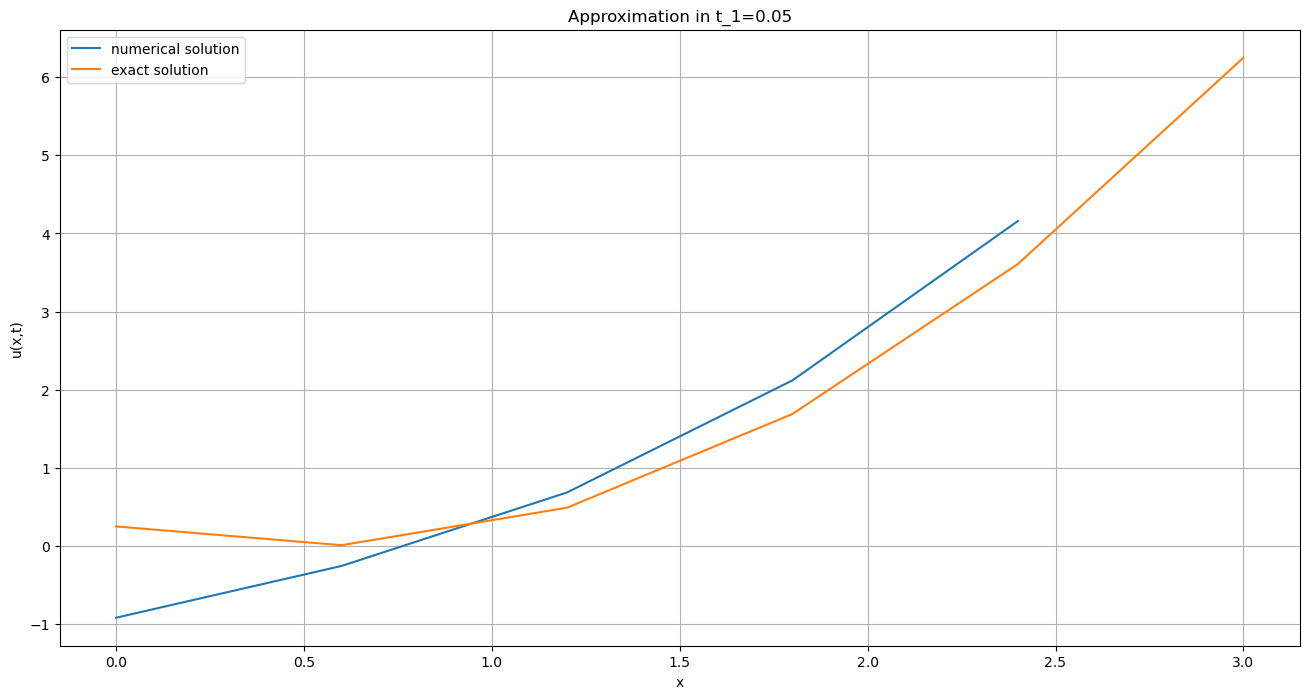

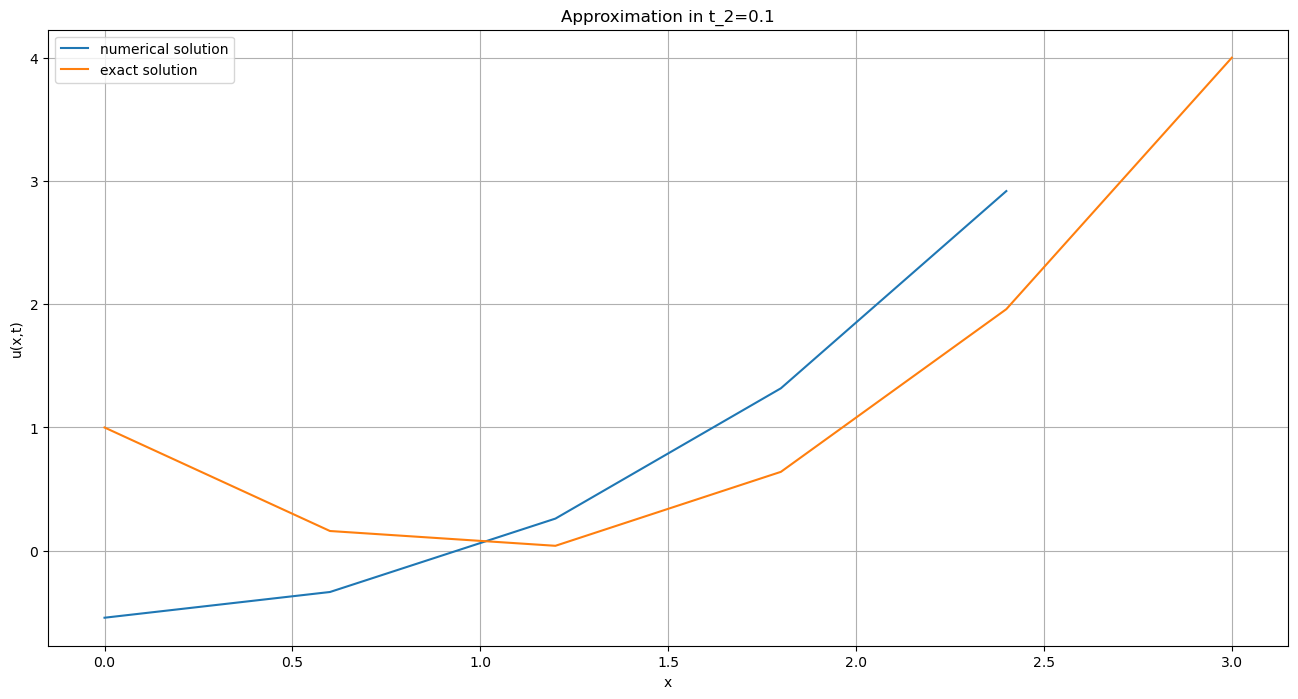

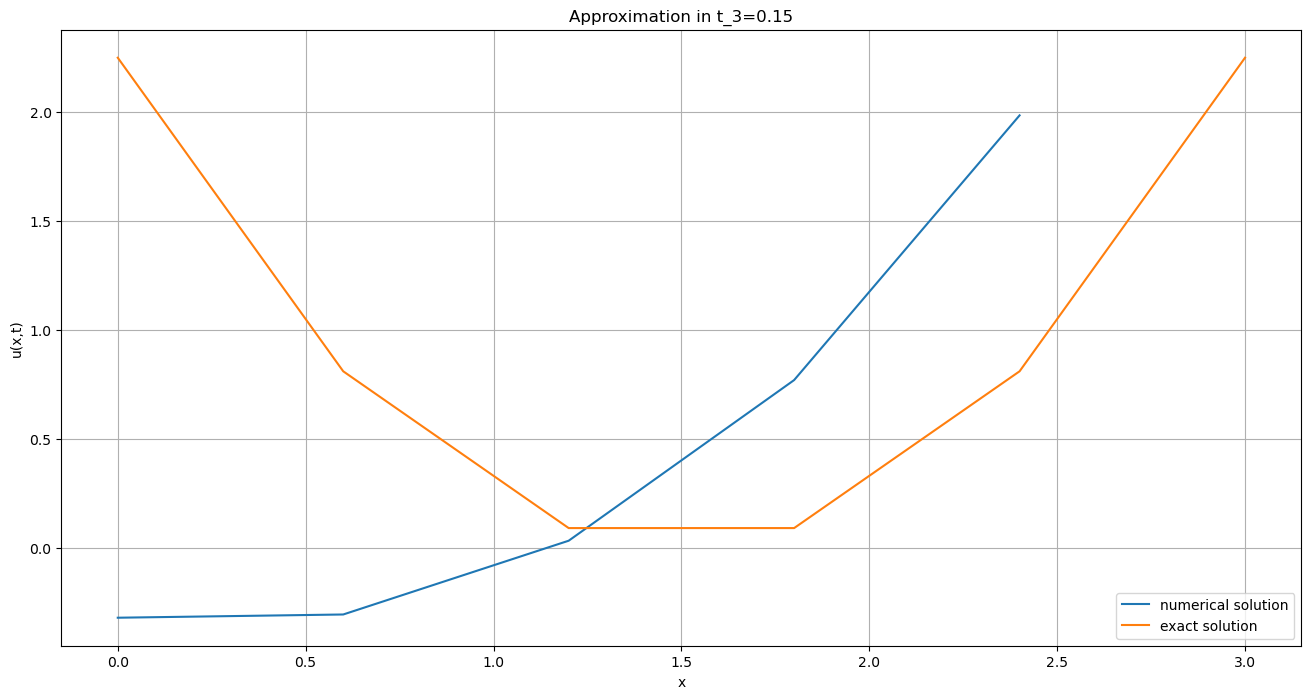

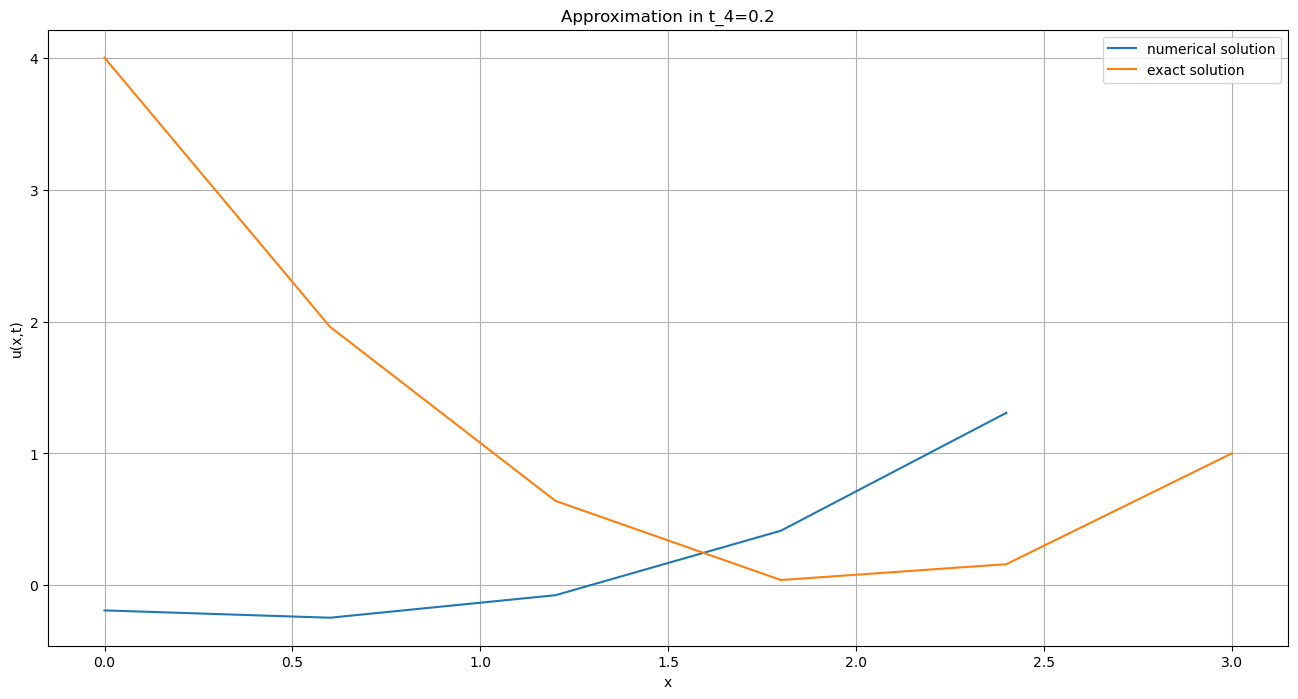

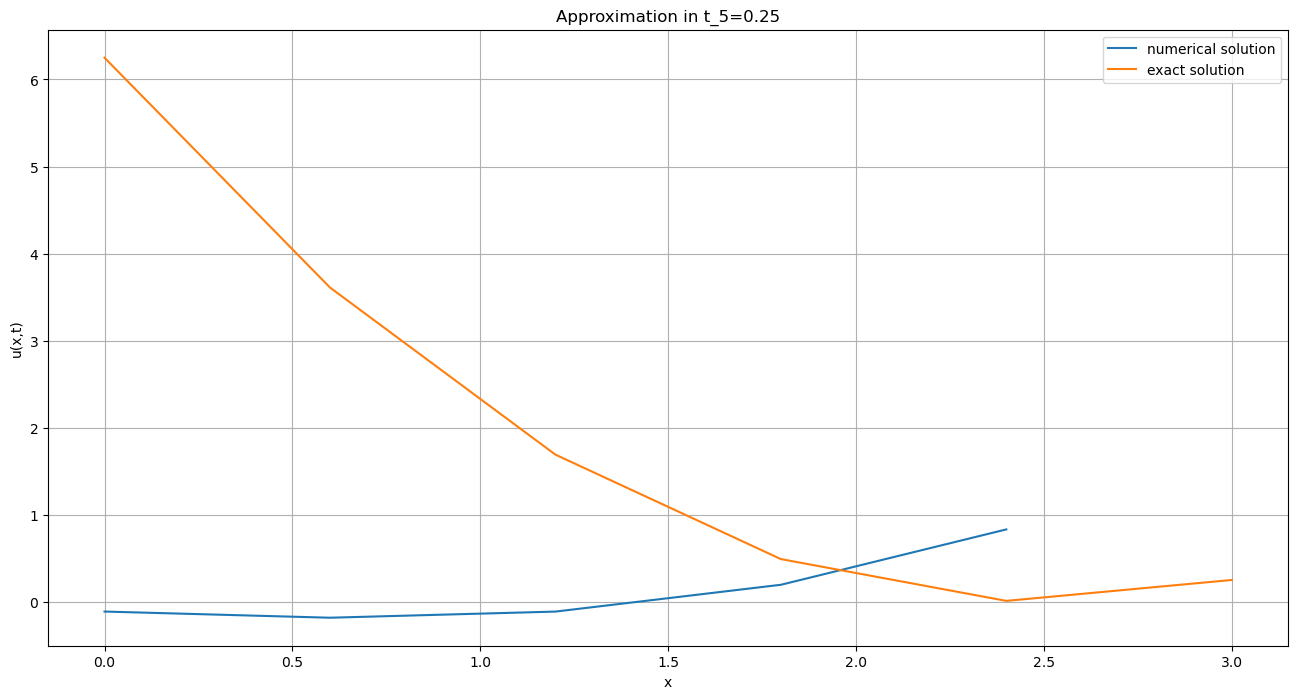

In [50]:
y = diff_scheme_solve(nodes_x, nodes_t, h, tau, sigma, u_0, a)

for j, t in enumerate(nodes_t):
    plt.figure(figsize=(16, 8))
    plt.plot(nodes_x[:-1], y[:-1, j], label='numerical solution')
    plt.plot(nodes_x, u(nodes_x, t, a, u_0), label='exact solution')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.title('Approximation in t_' + str(j) + '=' + str(round(t, 2)))
    plt.legend()
    plt.show()

Как видим, действительно, построенное рещение достаточно точно описывает точное решение, что подтверждает устойчивость разностной схемы.